In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('atlantis_citizens_final.csv')


*Basic Information*

In [3]:
df.shape

(15751, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15751 entries, 0 to 15750
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Citizen_ID        15751 non-null  object 
 1   Diet_Type         15751 non-null  object 
 2   District_Name     15751 non-null  object 
 3   Occupation        15751 non-null  object 
 4   Wealth_Index      14696 non-null  float64
 5   House_Size_sq_ft  14554 non-null  float64
 6   Life_Expectancy   15137 non-null  float64
 7   Vehicle_Owned     15751 non-null  object 
 8   Work_District     15751 non-null  object 
 9   Bio_Hash          15751 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Wealth_Index,House_Size_sq_ft,Life_Expectancy
count,14696.000000,14554.000000,15137.000000
mean,9529.708628,1417.153772,51.913391
std,20502.182375,2233.194323,16.567063
min,1000.000000,100.000000,20.000000
25%,1978.000000,205.000000,40.000000
50%,3794.500000,477.000000,49.000000
75%,8951.500000,1470.750000,60.000000
max,589377.000000,10000.000000,110.000000


In [6]:
df.columns

Index(['Citizen_ID', 'Diet_Type', 'District_Name', 'Occupation',
       'Wealth_Index', 'House_Size_sq_ft', 'Life_Expectancy', 'Vehicle_Owned',
       'Work_District', 'Bio_Hash'],
      dtype='object')

**Exploratory Data Analysis**

*Class Distribution*

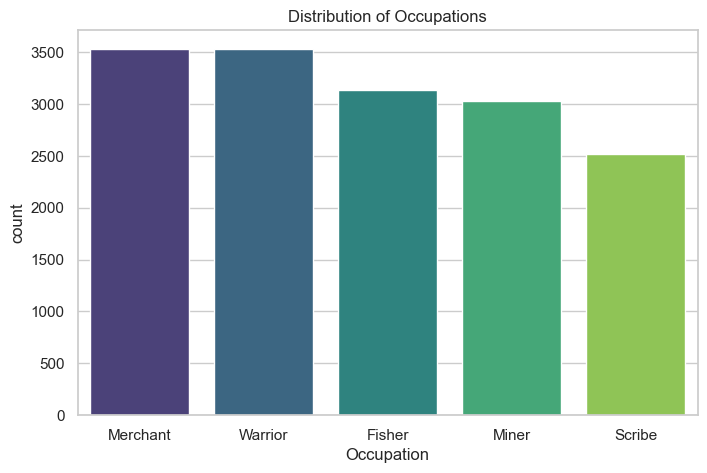

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().index, palette='viridis')
plt.title('Distribution of Occupations')
plt.show()


*Numerical Features Distribution*

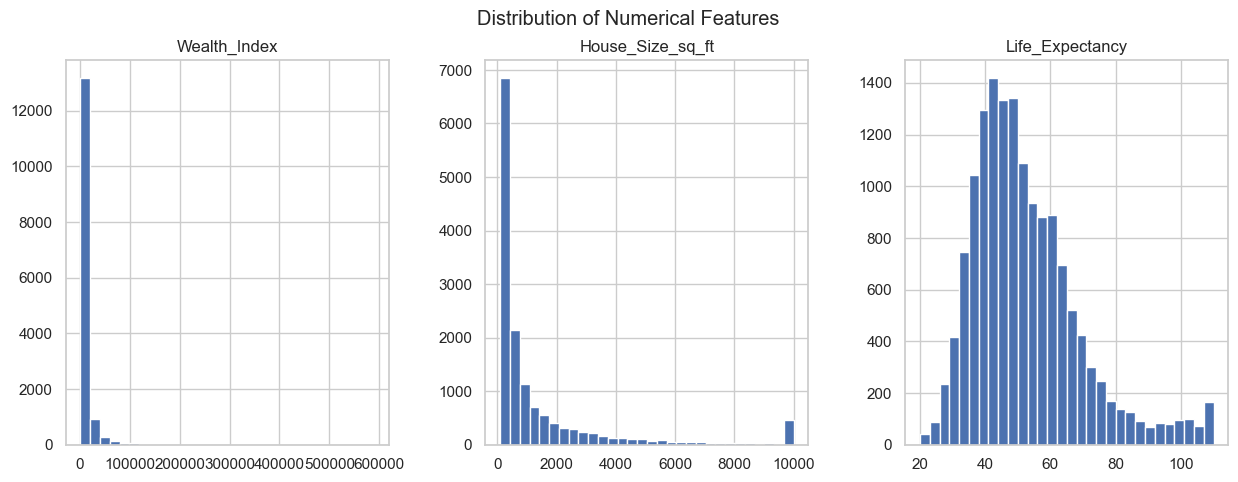

In [8]:
numerical_cols = ['Wealth_Index', 'House_Size_sq_ft', 'Life_Expectancy']
df[numerical_cols].hist(bins=30, figsize=(15, 5), layout=(1, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()


*Categorical Features Analysis*

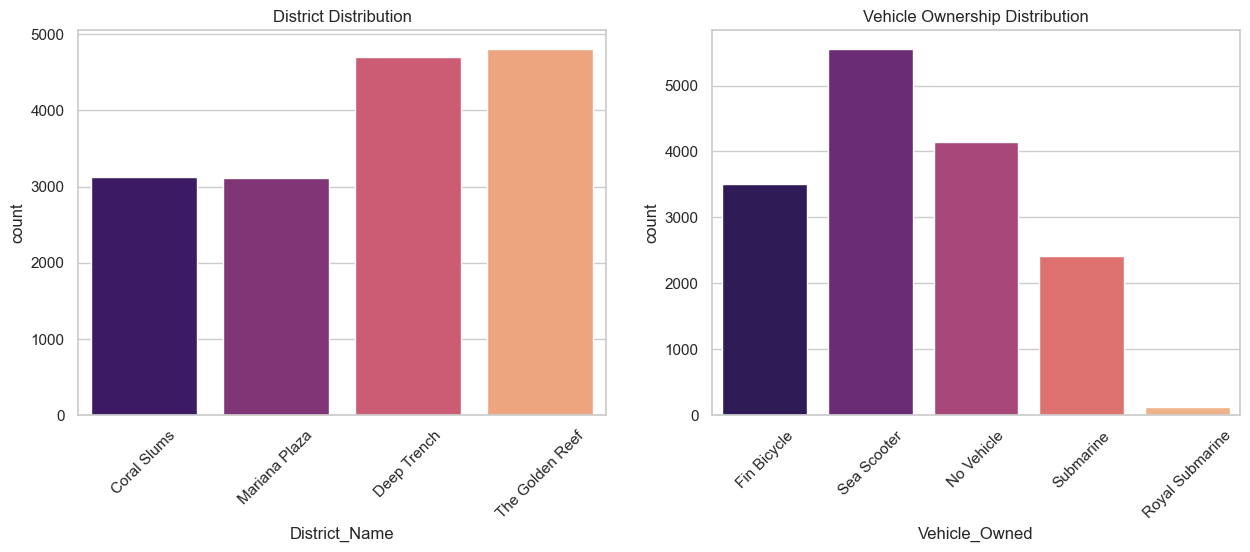

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='District_Name', palette='magma')
plt.title('District Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Vehicle_Owned', palette='magma')
plt.title('Vehicle Ownership Distribution')
plt.xticks(rotation=45)
plt.show()

*Correlation Heatmap*

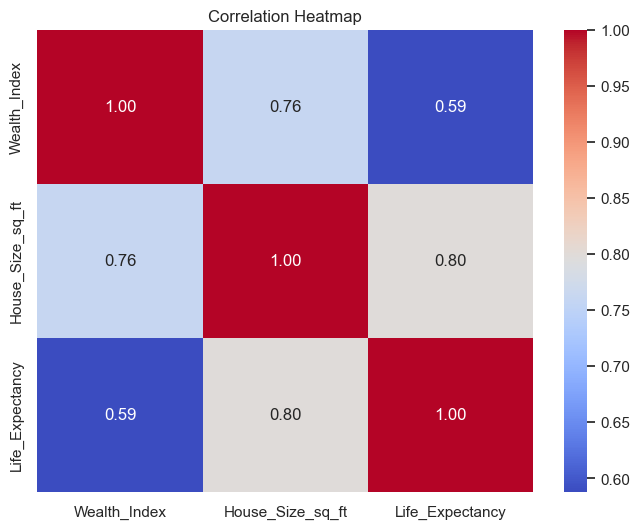

In [10]:
plt.figure(figsize=(8, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Data Preprocessing**

*Handling Missing Values*

In [11]:
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])


*Dropping Unnecessary columns*

In [12]:
df_clean = df.drop(columns=['Citizen_ID', 'Bio_Hash'])


*Feature Seperation*

In [13]:
X = df_clean.drop('Occupation', axis=1)
y = df_clean['Occupation']


*Feature Encoding*

In [14]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)


In [15]:
categorical_cols = ['Diet_Type', 'District_Name', 'Vehicle_Owned', 'Work_District']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


*Feature Scaling*

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessing Complete.")
print(f"Features shape: {X_scaled.shape}")

Preprocessing Complete.
Features shape: (15751, 15)


**Train-Test Split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 12600
Test set size: 3151


**Model Training**

In [18]:
models = {
    "Logistic Regression": LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.


**Model Evaluation**

In [19]:
results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })
    
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))
    

--- Logistic Regression ---
              precision    recall  f1-score   support

      Fisher       0.46      0.37      0.41       606
    Merchant       0.73      0.77      0.75       740
       Miner       0.57      0.55      0.56       609
      Scribe       0.67      0.67      0.67       486
     Warrior       0.65      0.73      0.69       710

    accuracy                           0.63      3151
   macro avg       0.62      0.62      0.62      3151
weighted avg       0.62      0.63      0.62      3151

--- Decision Tree ---
              precision    recall  f1-score   support

      Fisher       0.38      0.35      0.37       606
    Merchant       0.67      0.72      0.69       740
       Miner       0.48      0.51      0.49       609
      Scribe       0.59      0.57      0.58       486
     Warrior       0.57      0.55      0.56       710

    accuracy                           0.55      3151
   macro avg       0.54      0.54      0.54      3151
weighted avg       0.54    

*Confusion Matrix*

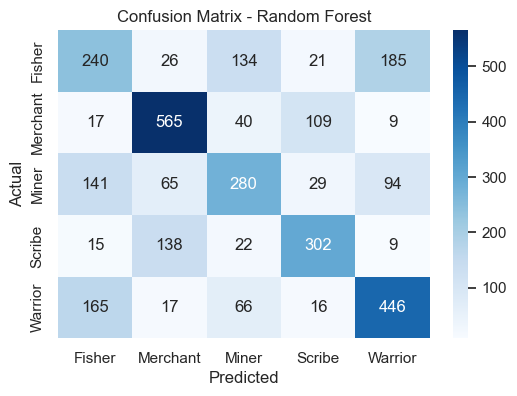

In [20]:
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model Comparison**

In [21]:
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='F1-Score', ascending=False))

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.627420,0.619353,0.627420,0.621866
2,Random Forest,0.581720,0.576218,0.581720,0.578167
1,Decision Tree,0.547445,0.543958,0.547445,0.545105


**Feature Importance**

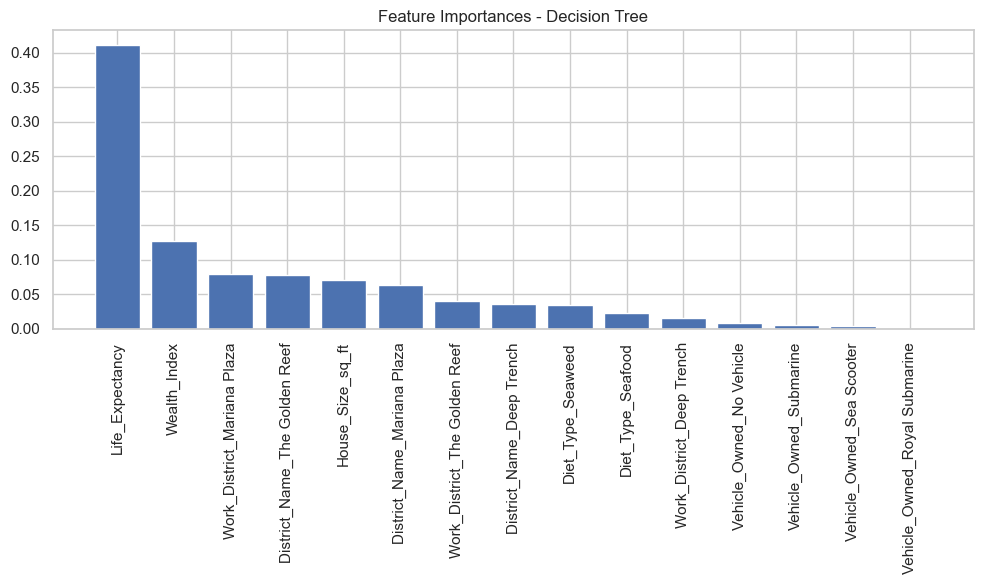

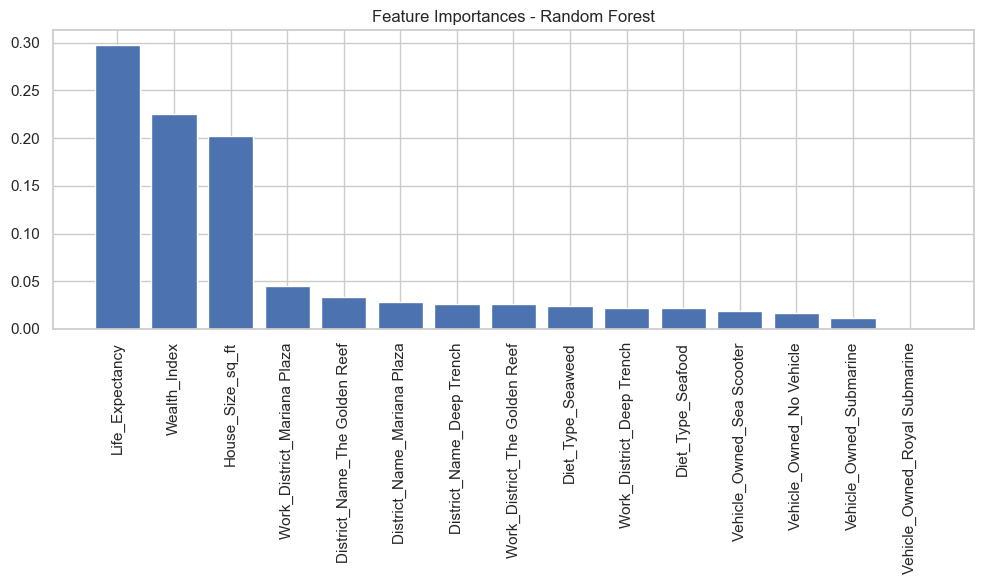

In [22]:

feature_names = X.columns

for name in ['Decision Tree', 'Random Forest']:
    model = trained_models[name]
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances - {name}")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [23]:
best_model_row = results_df.sort_values(by='F1-Score', ascending=False).iloc[0]
best_model_name = best_model_row['Model']
best_model = trained_models[best_model_name]

print(f"Selected Best Model: {best_model_name} with F1-Score: {best_model_row['F1-Score']:.4f}")


df_full = pd.read_csv('atlantis_citizens_final.csv')
df_full_clean = df_full.copy()

df_full_clean[numerical_cols] = num_imputer.transform(df_full_clean[numerical_cols])

X_full = df_full_clean.drop(columns=['Citizen_ID', 'Bio_Hash', 'Occupation'])
X_full = pd.get_dummies(X_full, columns=categorical_cols, drop_first=True)

X_full_scaled = scaler.transform(X_full)


all_predictions_encoded = best_model.predict(X_full_scaled)
all_predictions_labels = le_target.inverse_transform(all_predictions_encoded)

occupation_map = {
    'Warrior': 0,
    'Merchant': 1,
    'Fisher': 2,
    'Miner': 3,
    'Scribe': 4
}

output_df = pd.DataFrame({
    'Citizen_ID': df_full['Citizen_ID'],
    'Occupation': [occupation_map[label] for label in all_predictions_labels]
})


print(output_df['Occupation'].value_counts())


output_df.to_csv('predicted_occupations.csv', index=False)
print("predicted_occupations.csv generated successfully using " + best_model_name + ".")

Selected Best Model: Logistic Regression with F1-Score: 0.6219
Occupation
0    4003
1    3652
3    3004
2    2578
4    2514
Name: count, dtype: int64
predicted_occupations.csv generated successfully using Logistic Regression.
